
**WHAT IS THIS DATASET ABOUT??**

**The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.**



Attribute Information:

 **1. Age of patient at time of operation (numerical)**

 **2. Patient's year of operation (year - 1958, numerical)**

 **3. Number of positive axillary nodes detected (numerical)**

 **4. Survival status (class attribute)**

   *1 = the patient survived 5 years or longer*

   *2 = the patient died within 5 year*



In [63]:
import warnings 
warnings.filterwarnings("ignore") 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
haberman = pd.read_csv("haberman.csv")

**Data Points- No of Rows and Features - Total columns**

In [65]:
print (haberman.shape)  

(306, 4)


In [66]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


** How many Data points for each class are present? **
 
 **ANSWER- 2**

 **Python Code Below**

In [67]:
haberman['status'] = haberman['status'].map({1: "Survived", 2: "Not Survived"})
haberman["status"].value_counts()

Survived        225
Not Survived     81
Name: status, dtype: int64

 **OBJECTIVE**

We need to check whether a particular patient survived for less or more than 5 years based on  their AGE, YEAR and no of NODES they operated during the surgery

 VARIABLES NEED TO CONSIDER for Comparision- AGE, YEAR and NODES-------- TOTAL- 3
 To determine the status 1 or 2 

 Mathametical point- 3C2= 3
  1. (AGE,YEAR)
  2. (AGE,NODES)
  3. (YEAR,NODES)



###  **Bi-variate analysis (scatter plots, pair-plots)**

## SCATTER PLOT

   **1. SCATTER PLOT BETWEEN AGE AND YEAR**

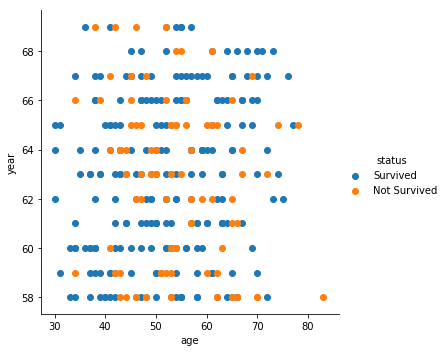

In [68]:

g = sns.FacetGrid(haberman, hue='status',height=5)  # Defining Axis
g = g.map(plt.scatter, "age", "year").add_legend() # Plotting

plt.show()



#### OBSERVATIONS FOR THE ABOVE PLOT
     UNABLE TO DETERMINE AS POINTS ARE SCATTERED EVERYWHERE AND OVERLAPPING EACH OTHER

   **2. SCATTER PLOT BETWEEN AGE AND NODES**

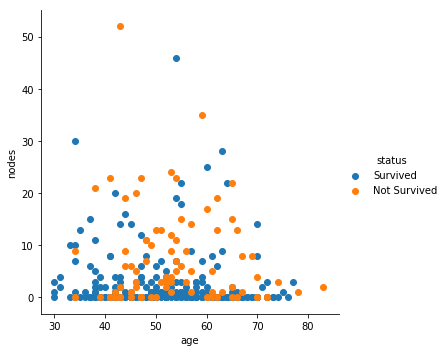

In [69]:


g = sns.FacetGrid(haberman, hue='status',height=5)  # Defining Axis
g = g.map(plt.scatter, "age", "nodes").add_legend() # Plotting

plt.show()


#### OBSERVATIONS FOR THE ABOVE PLOT
     UNABLE TO DETERMINE AS POINTS ARE SCATTERED EVERYWHERE AND OVERLAPPING EACH OTHER.
     THERE ARE MANY OUTLIERS FROM THE ABIVE PLOT, HENCE THE DATA POINTS COLLLECTED ARE NOT ACCURATE.

   **3. SCATTER PLOT BETWEEN YEAR AND NODES**

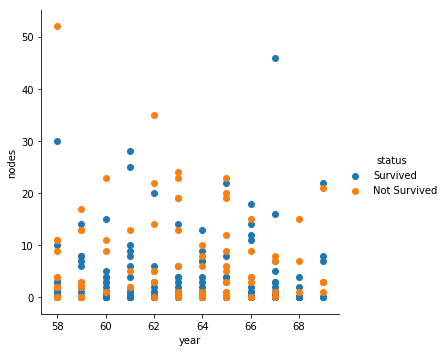

In [70]:


g = sns.FacetGrid(haberman, hue='status',height=5)  # Defining Axis
g = g.map(plt.scatter, "year", "nodes").add_legend() # Plotting

plt.show()

#### OBSERVATIONS FOR THE ABOVE PLOT
     UNABLE TO DETERMINE AS POINTS ARE SCATTERED EVERYWHERE AND OVERLAPPING EACH OTHER

## PAIR PLOT

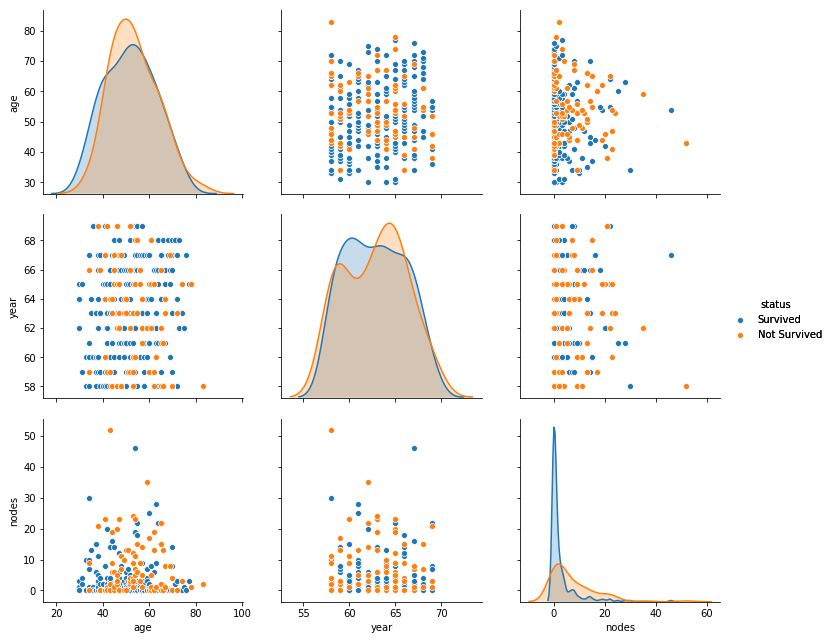

In [71]:
sns.pairplot(haberman, hue="status", height=3).add_legend()
plt.show()


#### OBSERVATIONS FOR THE ABOVE PLOT
     UNABLE TO DETERMINE AS POINTS ARE SCATTERED EVERYWHERE AND OVERLAPPING EACH OTHER

# Univaraite analysis( PDF, CDF, Boxplot, Voilin plots)

## 1. PDF

  ##### HERE THE HEIGHT OF THE BAR DENOTES THE PERCENTAGE OF DATA POINTS UNDER THE CORRESPONDING GROUP

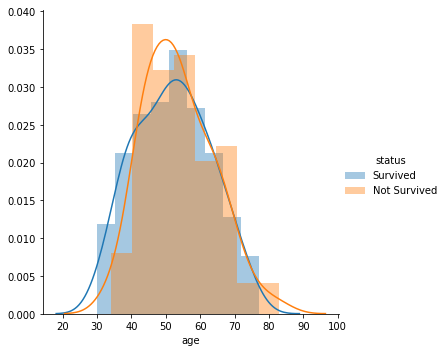

In [72]:
#PDF FOR AGE
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "age").add_legend();
plt.show();


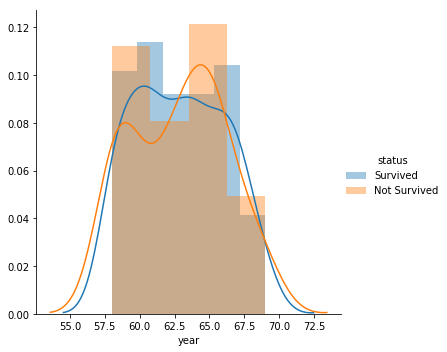

In [73]:
#PDF FOR YEAR

sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "year").add_legend();
plt.show();

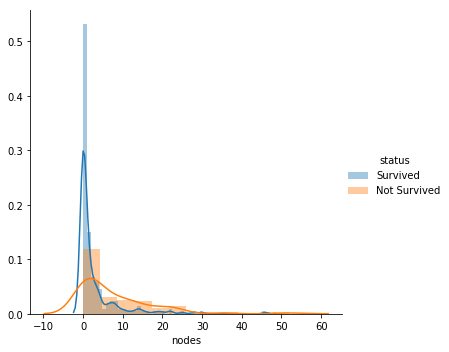

In [74]:
#PDF FOR NODES

sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "nodes").add_legend();
plt.show();

#### OBSERVATIONS FOR PDF

#### FROM THE PDF PLOT OF NODES IT IS CLEAR THAT PDF OF  SURVIVAL IS HIGH MORE THAN 5 YRS.

#### IF 'NODES' <= 3 THEN THE PERSON IS SURVIVED ELSE DIED LESS THAN 5 YRS.

## 2. CDF

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


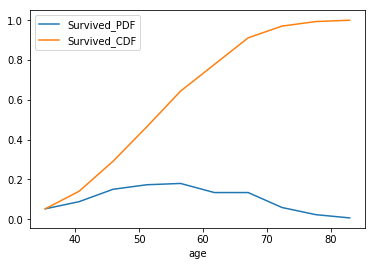

In [75]:


#AGE
counts, bin_edges = np.histogram(haberman['age'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)


plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("age")
plt.ylabel("P(X)")

plt.show();

#### OBSERVATIONS for CDF

#### WHEN we plot CDF for AGE we get to know that more the AGE the less chance of survival of more than 5 years.

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


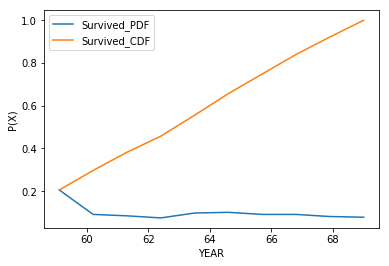

In [85]:
#PDF- YEAR

counts, bin_edges = np.histogram(haberman['year'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("YEAR")
plt.ylabel("P(X)")



plt.show();

#### OBSERVATIONS 
#### YEAR IS AMBIGIOUS TO CALCULATE

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


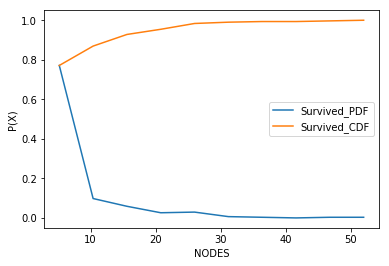

In [84]:
#PDF NODES

counts, bin_edges = np.histogram(haberman['nodes'], bins=10, density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.xlabel("NODES")
plt.ylabel("P(X)")



plt.show();



#### OBSERVATIONS
#### FROM THE ABOVE GRAPH WE CAN SAY THAT 4% HAVE LESS THAN 10 AUXILLARY NODES DETECTED AND SURVIVED

## 3. BOX PLOT

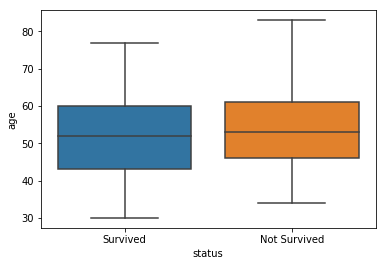

In [78]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

#### OBSERVATIONS WITH X-AXIS AS STATUS AND Y-AXIS AS AGE

#### PEOPLE WILL SURVIVE MORE THAN 5 YEARS IF THE AGE IS BETWEEN 42 AND 60

#### PEOPLE WILL SURVIVE LESS THAN 5 YEARS IF THE AGE IS BETWEEN 45 AND 61

 #### COMBINING THE ABOVE TWO WE CAN CONCLUDE THAT AGE LESS THAN 45 WILL SURVIVE MORE THAN 5 YEARS AND AGE MORE THAN 60 WILL NOT SURVIVE MORE THAN 5 YEARS

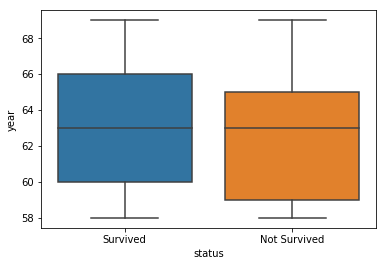

In [79]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

#### OBSERVATIONS WITH X-AXIS AS STATUS AND Y-AXIS AS YEAR
#### YEAR IS AMBIGIOUS TO CALCULATE

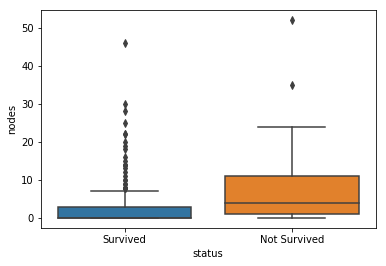

In [80]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()



#### OBSERVATIONS

#### PEOPLE WILL SURVIVE MORE THAN 5 YEARS IF THE NODES IS 3 OR LESS
#### PEOPLE WILL SURVIVE LESS THAN 5 YEARS IF THE NODES IS 4 OR MORE

## 4. Violin Plot

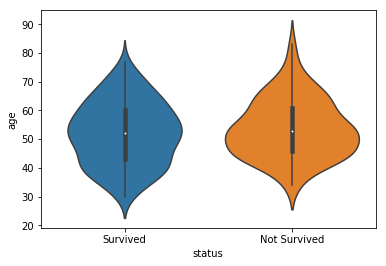

In [81]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()



#### OBSERVATIONS- same as box plot

#### PEOPLE WILL SURVIVE MORE THAN 5 YEARS IF THE AGE IS BETWEEN 42 AND 60

#### PEOPLE WILL SURVIVE LESS THAN 5 YEARS IF THE AGE IS BETWEEN 45 AND 61

#### COMBINING THE ABOVE TWO WE CAN CONCLUDE THAT AGE LESS THAN 45 WILL SURVIVE MORE THAN 5 YEARS AND AGE    MORE THAN 60 WILL NOT SURVIVE MORE THAN 5 YEARS

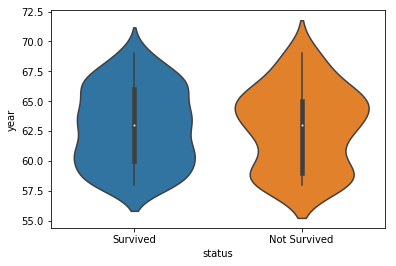

In [82]:
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.show()



#### OBSERVATIONS
#### YEAR IS AMBIGIOUS TO CALCULATE

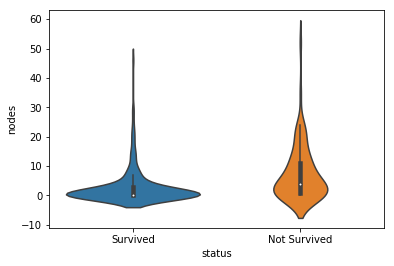

In [83]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()



#### OBSERVATIONS

#### PEOPLE WILL SURVIVE MORE THAN 5 YEARS IF THE NODES IS 3 OR LESS

#### PEOPLE WILL SURVIVE LESS THAN 5 YEARS IF THE NODES IS 4 OR MORE

--------------------------------------------------------------------------------------------------------------------------------

## CONCLUSION

#### BY PLOTTING ALL THE PLOTS WE GET TWO CONCLUSIONS :

  #### 1.  IF NUMBER OF AXILLARY NODE IS LESS,THAN SURVIVAL OF PATIENTS IS MORE. (HIGH CHANCE)
  #### 2.  IF AGE LESS THAN 45 WILL SURVIVE MORE THAN 5 YEARS AND AGE MORE THAN 60 WILL NOT SURVIVE MORE THAN 5 YEARS